# Setup environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filepath = '/content/drive/MyDrive/Violence Fairness/'

# Install Packages

In [3]:
!pip install parity-fairness --upgrade

     |████████████████████████████████| 174kB 6.3MB/s 
     |████████████████████████████████| 24.6MB 178kB/s 
     |████████████████████████████████| 143kB 54.3MB/s 
     |████████████████████████████████| 2.6MB 37.0MB/s 
     |████████████████████████████████| 1.6MB 44.1MB/s 
     |████████████████████████████████| 133kB 39.2MB/s 
     |████████████████████████████████| 5.8MB 23.6MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
     |████████████████████████████████| 7.2MB 54.4MB/s 
     |████████████████████████████████| 1.8MB 46.0MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 3.6MB 42.1MB/s 
     |████████████████████████████████| 5.5MB 41.2MB/s 
     |████████████████████████████████| 296kB 51.1MB/s 
     |████████████████████████████████| 276kB 50.9MB/s 
     |████████████████████████████████| 122kB 51.1MB/s 
     |████████████████████████████████| 860kB 44.4MB/s 
     |████████████████████████████████| 358kB 38.4MB/

In [4]:
!pip install pandas-profiling --upgrade

     |████████████████████████████████| 245kB 5.3MB/s 
     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 3.1MB 6.6MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 604kB 26.2MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 296kB 43.1MB/s 
  Created wheel for phik: filename=phik-0.11.0-cp36-none-any.whl size=599738 sha256=0e3b46876879de1be3137c49d41e5231fff27d9dd16ed84c4d981f5db335769b
  Stored in directory: /root/.cache/pip/wheels/af/54/11/aba77f21075918de02f7964eabfe8c10d5542df9e6ad10b225
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=84e41d3bef62943c3a7d14c163a228bbb4c9941963ccbec3fe51319ebab0989d
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'

# Import Libraries

In [5]:
# Fairness metrics and mitigation from the parity-fairness package
from parity.fairness_metrics import *
from parity.fair import *

# For Exploratory Data Analysis
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
sns.set_palette('cool')


%matplotlib inline
# Data manipulation libraries
import pandas as pd
import numpy as np

# ML libraries
from sklearn.ensemble import RandomForestClassifier

# Loads Model
import joblib 

# Display
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")

#Load Data

In [6]:
data = pd.read_csv(filepath + 'data/compas_recidivism.csv')

# EDA

Generates a report of the profiling of the dataset

In [50]:
dataset_profile = ProfileReport(data, title="Pandas Profiling Report")

 Export it to an html


In [51]:
dataset_profile.to_file(filepath + "pandas_profiling/reduced_violence_dataset_profilling.html")

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Check Bias on Dataset
Next cells will evaluate the `whole dataset` using the `five fairness metrics` and display if there are bias in the three protected attributes namely `age_cat`, `sex`,  and `race`.

#### Age Group


### Check bias metrics :

A model can be considered bias if just one of these five metrics show that this model is biased.

#### For the age_cat attribute :

With default thresholds, bias against unprivileged group detected in **2** out of 5 metrics

,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,disparate_impact,theil_index
objective,0.000000,0.00000,0.00000,1.000000,0.00000
age_cat,-0.141911,-0.08795,0.13208,0.831188,0.16354


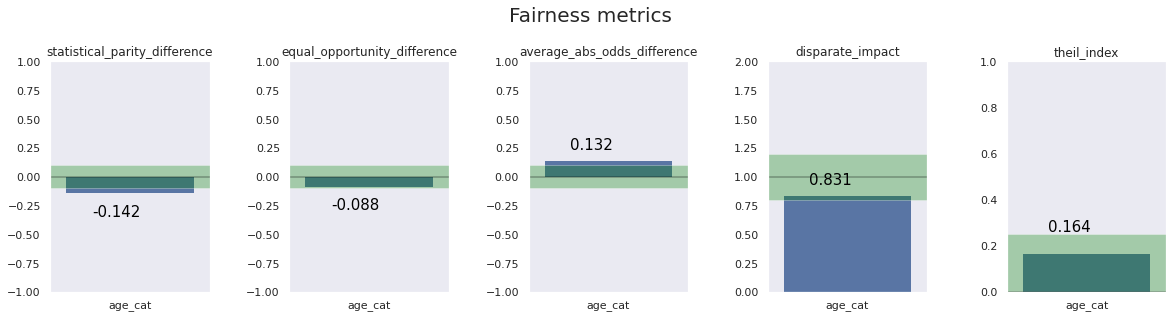

In [7]:
priv_category = 'age_cat'
priv_value = 'Greater than 45'
target_label = 'is_recid'
unencoded_target_label = 'No'
cols_to_drop = ''

show_bias(data, priv_category, priv_value, target_label, unencoded_target_label, cols_to_drop)

#### Sex

### Check bias metrics :

A model can be considered bias if just one of these five metrics show that this model is biased.

#### For the sex attribute :

With default thresholds, bias against unprivileged group detected in **4** out of 5 metrics

,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,disparate_impact,theil_index
objective,0.000000,0.000000,0.000000,1.000000,0.000000
sex,-0.130711,-0.115828,0.105802,0.576763,0.213012


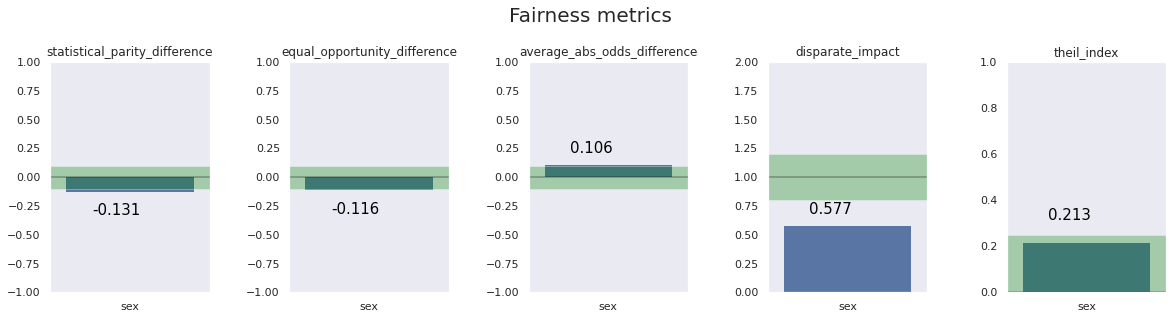

In [8]:
priv_category = 'sex'
priv_value = 'Male'
target_label = 'is_recid'
unencoded_target_label = 'Yes'
cols_to_drop = ''

show_bias(data, priv_category, priv_value, target_label, unencoded_target_label, cols_to_drop)

#### Race

### Check bias metrics :

A model can be considered bias if just one of these five metrics show that this model is biased.

#### For the race attribute :

With default thresholds, bias against unprivileged group detected in **2** out of 5 metrics

,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,disparate_impact,theil_index
objective,0.000000,0.000000,0.000000,1.000000,0.000000
race,-0.124255,-0.077013,0.100028,0.843363,0.161839


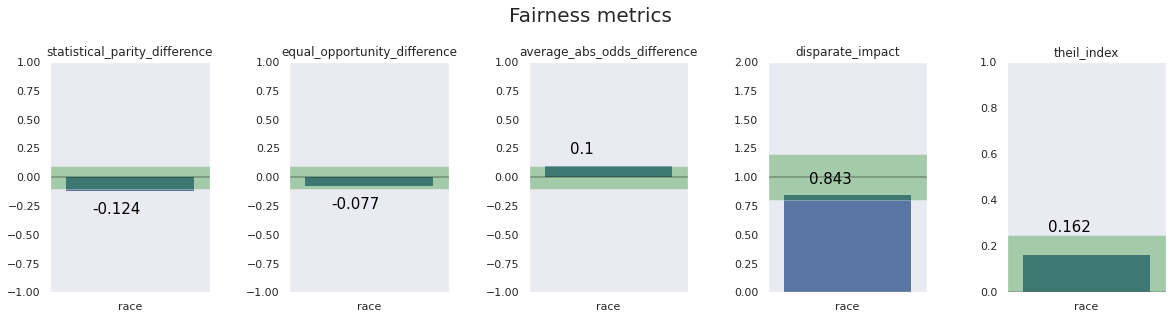

In [9]:
priv_category = 'race'
priv_value = 'Caucasian'
target_label = 'is_recid'
unencoded_target_label = 'No'
cols_to_drop = ''

show_bias(data, priv_category, priv_value, target_label, unencoded_target_label, cols_to_drop)

# Fairness & Bias Mitigations

To evaluate and mitigate the fairness of a different protected attribute, change the `priv_category` and `priv_value` accordingly.

### Prepare Data
It is important to setup the data such that the `target column` is a `binary string` target. Then specify out which feature are the `privileged category` and which value are `privileged value`. Before using the different bias mitigation functions, necessary objects must be also prepared using the function `prepare_data`. Once the dataset is processed into an aif360 standard dataset format which in this case is stored in `data_orig`, split this into testing and training datasets. Along with other different objects: `encoders`, `numerical_features` and `categorical_features`, these will all be fed appropriately when using mitigation tools.

Set the privilege category and value

In [10]:
priv_category = 'race'
priv_value = 'Caucasian'
target_label = 'is_recid'
unencoded_target_label = 'No'
cols_to_drop = ''

Preparing datasets and other needed lists

In [11]:
data_orig, encoders_orig, numerical_features_orig, categorical_features_orig = prepare_data(data, priv_category, priv_value, target_label, 
                             priv_target_value=unencoded_target_label, ignore_cols=cols_to_drop)

Split train test dataset

In [12]:
np.random.seed(42)

data_orig_train, data_orig_test = data_orig.split([0.7], shuffle = True)

# Check bias on Model

Train model on original data

In [13]:
rf_orig_model = RandomForestClassifier().fit(data_orig_train.features, 
                     data_orig_train.labels.ravel(), 
                     sample_weight=data_orig_train.instance_weights)

Save model of original data

In [14]:
joblib.dump(rf_orig_model, filepath+'models/rf_orig_model_' + priv_category + '.sav')

['/content/drive/MyDrive/Violence Fairness/models/rf_orig_model_race.sav']

## Load Original model

Load the previously saved model


In [15]:
rf_orig_model = joblib.load(filepath +'models/rf_orig_model_' + priv_category + '.sav')

In [16]:
X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()

Checks performance of the model

#### Accuracy of the model :

0.7155453951665578


#### F1 score of the model :

0.5384207737148914


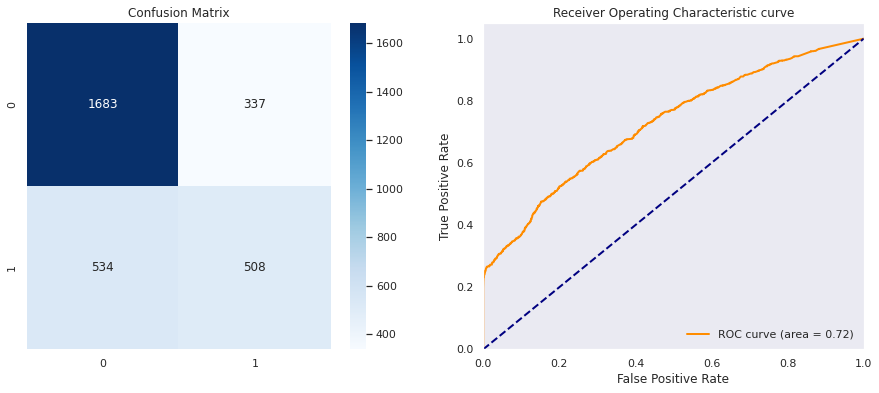

In [17]:
plot_model_performance(rf_orig_model, X_test, y_test)

## Fairness Metrics

A common problem with most machine learning models is bias from data. This notebook shows how to measure those biases and perform bias mitigation. A python package called [aif360](https://github.com/IBM/AIF360) can give us metrics and algorithms for bias measurement and mitigation


* Statistical Parity Difference
* Equal Opportunity Difference
* Average Absolute Odds Difference
* Disparate Impact
* Theil Index

### Statistical Parity Difference

This measure is based on the following formula : 

$$ Pr(Y=1|D=unprivileged) - Pr(Y=1|D=privileged) $$

*Statistical imparity* is the difference between the probability that a random individual drawn from unprivileged is labeled 0 and the probability that a random individual from privileged is labeled 1.

Fairer scores are close to **0**.

More documentation here [One definition of algorithmic fairness: statistical parity](https://jeremykun.com/2015/10/19/one-definition-of-algorithmic-fairness-statistical-parity/).


### Equal Opportunity Difference

This metric is just a difference between the true positive rate of unprivileged group and the true positive rate of privileged group.

$$ TPR_{D=unprivileged} - TPR_{D=privileged} $$ 

Fairer scores are close to **0**.

### Average Absolute Odds Difference

This measure is using both false positive rate and true positive rate to calculate the bias.

$$ \frac{1}{2}[|FPR_{D=unprivileged} - FPR_{D=privileged} | + | TPR_{D=unprivileged} - TPR_{D=privileged}|]$$

Fairer scores are close to **0**.

### Disparate Impact

For this metric we use the following formula :

$$ \frac{Pr(Y=1|D=unprivileged)}{Pr(Y=1|D=privileged)} $$

Like the first metric we use both probabities of a random individual drawn from unprivileged or privileged with a label of 1 but here it's a ratio. 

Better disparate impact should be closer to **1**.

### Theil Index

This measure is also known as the generalized entropy index but with $\alpha$ equals to 1. More information here [Generalized Entropy Index](https://en.wikipedia.org/wiki/Generalized_entropy_index)).

$$ \frac{1}{n} \sum_{i=0}^{n} \frac{b_i}{\mu} ln \frac{b_i}{\mu} $$ 

Where $b_i = \hat{y}_i - y_i + 1 $

Fairer scores are close to **0**.


Some metrics need predictions while others just the original dataset. This is why we will use 2 classes of the aif360 package : `ClassificationMetric` and `BinaryLabelDatasetMetric`. 

### For `ClassificationMetric` : 
* [Equal Opportunity Difference: ](https://aif360.readthedocs.io/en/latest/modules/metrics.html#aif360.metrics.ClassificationMetric.equal_opportunity_difference) `equal_opportunity_difference()`
* [Average Absolute Odds Difference: ](https://aif360.readthedocs.io/en/latest/modules/metrics.html#aif360.metrics.ClassificationMetric.average_abs_odds_difference) `average_abs_odds_difference()`
* [Theil Index : ](https://aif360.readthedocs.io/en/latest/modules/metrics.html#aif360.metrics.ClassificationMetric.theil_index) `theil_index()`

### For `BinaryLabelDatasetMetric` : 
* [Statistical Parity Difference: ](https://aif360.readthedocs.io/en/latest/modules/metrics.html#aif360.metrics.BinaryLabelDatasetMetric.statistical_parity_difference) `statistical_parity_difference()`
* [Disparate Impact: ](https://aif360.readthedocs.io/en/latest/modules/metrics.html#aif360.metrics.ClassificationMetric.disparate_impact) `disparate_impact()`

In [18]:
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

### Display Bias

The following codes will display the fairness metrics on the protected attribute. In this case `original test dataset` given the `original model` were used to evaluate the bias.

# Bias metrics for the model with protected attribute: race

### Check bias metrics :

A model can be considered bias if just one of these five metrics show that this model is biased.

#### For the race attribute :

With default thresholds, bias against unprivileged group detected in **2** out of 5 metrics

,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,disparate_impact,theil_index
objective,0.000000,0.000000,0.000000,1.000000,0.000000
race,-0.140322,-0.088268,0.123412,0.823634,0.164798


CPU times: user 591 ms, sys: 209 ms, total: 800 ms
Wall time: 591 ms


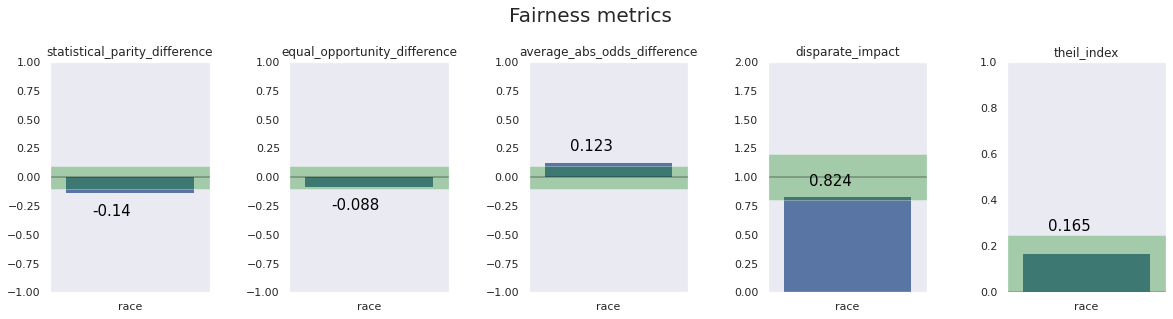

In [19]:
%%time

# Display bias on unmitigated original test data
display(Markdown('# Bias metrics for the model with protected attribute: ' + priv_category))
fair = get_fair_metrics_and_plot(data_orig_test, rf_orig_model)

Next codes will derive the probabilities and predictions to be stacked on the algo_metrics dataframe along with the fairness metrics result and other information such as the original model.

In [20]:
# Get probabilities and predictions of the model
probs = rf_orig_model.predict_proba(data_orig_test.features)
preds = rf_orig_model.predict(data_orig_test.features)

# Add details in the algo_metrics dataframe
algo_metrics = add_to_df_algo_metrics(algo_metrics, rf_orig_model, fair, preds, probs, 'Origin')

# Bias Mitigation

There are three types of bias mitigation:
- Pre-processing algorithms : they are used before training the model
- In-processing algorithms : they are fair classifiers so it's during the training
- Post-processing algorithms : they are used after training the model


## Pre-processing Algorithms

### Disparate Impact Remover

Disparate impact remover is a preprocessing technique that edits feature values increase group fairness while preserving rank-ordering within groups. This method doesn't need predictions to fix bias.
If you want to see how it works you can take a look on [an example Notebook from the GitHub of AIF360](https://github.com/IBM/AIF360/blob/master/examples/demo_disparate_impact_remover.ipynb).

Source : [Feldman et al., 2015](https://dl.acm.org/citation.cfm?doid=2783258.2783311)

### Learning Fair Representation

Learning fair representations is a pre-processing technique that finds a latent representation which encodes the data well but obfuscates information about protected attributes.
You can find more information on [the demo notebook](https://github.com/IBM/AIF360/blob/master/examples/demo_lfr.ipynb).

Source : [Zemel et al., 2013](http://proceedings.mlr.press/v28/zemel13.html)

### Reweighing

Reweighing is a preprocessing technique that Weights the examples in each (group, label) combination differently to ensure fairness before classification.

Source : [Kamiran and Calders, 2012](https://link.springer.com/article/10.1007%2Fs10115-011-0463-8)

In order to mitigate fairness using the pre-processing algorithm, `original dataset` is fed on the mitigation tool and transformed into a readable dataframe. The mitigated data will then be split to training and testing dataset. Using the mitigated training dataset, retrain a new model. This mitigated model will then be reavaluated with the fairness metrics. Probabilities and predictions using the mitigated models will also be derived and inlcuded in the master dataframe called `algo_metrics`.

#### Disparate Impact Remover


In [22]:
# Remove bias through disparate impact remover
data_transf_df = disparate_impact_remover(data_orig)

# Decode to pandas dataframe for readability
decoded_df = decode_dataset(data_transf_df, encoders_orig, numerical_features_orig, categorical_features_orig)
decoded_df

,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_violent_recid,is_recid
0,Male,67.0,Greater than 45,Other,1.0,1.0,0.0,0.0,0.0,0.0,No
1,Male,34.0,25 - 45,African-American,1.0,3.0,0.0,0.0,0.0,1.0,Yes
2,Male,23.0,Less than 25,African-American,1.0,4.0,0.0,0.0,0.0,0.0,Yes
3,Male,23.0,Less than 25,African-American,1.0,8.0,0.0,0.0,0.0,0.0,No
4,Male,43.0,25 - 45,Other,1.0,1.0,0.0,0.0,3.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...
10200,Male,23.0,Less than 25,African-American,1.0,3.0,0.0,0.0,0.0,0.0,No
10201,Female,31.0,25 - 45,African-American,1.0,6.0,0.0,0.0,3.0,0.0,No
10202,Male,57.0,Greater than 45,Other,1.0,1.0,0.0,0.0,0.0,0.0,No
10203,Female,31.0,25 - 45,African-American,1.0,1.0,0.0,0.0,0.0,0.0,No


# Bias metrics for the model with protected attribute: race

### Check bias metrics :

A model can be considered bias if just one of these five metrics show that this model is biased.

#### For the race attribute :

With default thresholds, bias against unprivileged group detected in **4** out of 5 metrics

,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,disparate_impact,theil_index
objective,0.000000,0.000000,0.000000,1.000000,0.000000
race,-0.200043,-0.150399,0.182142,0.756992,0.165682


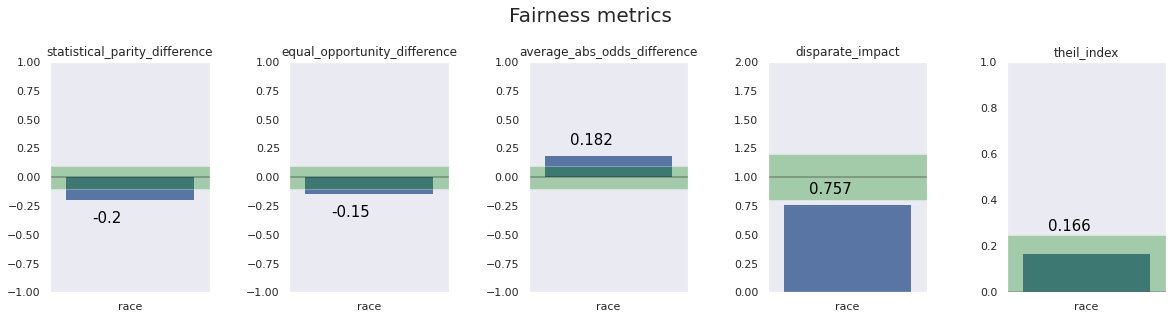

In [23]:
# Preparing the mitigated dataset
data_mitigated, encoders, numerical_features, categorical_features = prepare_data(data_transf_df, priv_category, priv_value, target_label, 
                             priv_target_value=unencoded_target_label, ignore_cols=cols_to_drop)

# Split mitigated data to train and test dataset
np.random.seed(42)
data_mitigated_train, data_mitigated_test = data_mitigated.split([0.7], shuffle=True) 

# Retrain a model using the mitigated data
rf_mitigated = RandomForestClassifier().fit(data_mitigated_train.features, 
                     data_mitigated_train.labels.ravel(), 
                     sample_weight=data_mitigated_train.instance_weights)

# Get the new probabilities and predictions using the retrained model
probs = rf_mitigated.predict_proba(data_orig_test.features)
preds = rf_mitigated.predict(data_orig_test.features)

# Evaluate fairness given the mitigated data
display(Markdown('# Bias metrics for the model with protected attribute: ' + priv_category))
fair = get_fair_metrics_and_plot(data_orig_test, rf_mitigated)

# Add details in the algo_metrics dataframe
algo_metrics = add_to_df_algo_metrics(algo_metrics, rf_mitigated, fair, preds, probs, 'Disparate Impact Remover')

#### Learning Fair Representation

Learning fair representations is a pre-processing technique that finds a latent representation which encodes the data well but obfuscates information about protected attributes.
You can find more information on [the demo notebook](https://github.com/IBM/AIF360/blob/master/examples/demo_lfr.ipynb).

Source : [Zemel et al., 2013](http://proceedings.mlr.press/v28/zemel13.html)

In [25]:
# Remove bias through LFR
data_transf_df = learning_fair_representation(data_orig, priv_category)

# Decode to pandas dataframe for readability
decoded_df = decode_dataset(data_transf_df, encoders_orig, numerical_features_orig, categorical_features_orig)
decoded_df

250 6827.000416529158


,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_violent_recid,is_recid
0,Female,34.987888,25 - 45,Other,0.064817,4.400959,0.079932,0.101042,3.253476,0.07927,No
1,Female,34.987888,25 - 45,African-American,0.064817,4.400959,0.079932,0.101042,3.253476,0.07927,No
2,Female,34.987888,25 - 45,African-American,0.064817,4.400959,0.079932,0.101042,3.253476,0.07927,No
3,Female,34.987888,25 - 45,African-American,0.064817,4.400959,0.079932,0.101042,3.253476,0.07927,No
4,Female,34.987888,25 - 45,Other,0.064817,4.400959,0.079932,0.101042,3.253476,0.07927,No
...,...,...,...,...,...,...,...,...,...,...,...
10200,Female,34.987888,25 - 45,African-American,0.064817,4.400959,0.079932,0.101042,3.253476,0.07927,No
10201,Female,34.987888,25 - 45,African-American,0.064817,4.400959,0.079932,0.101042,3.253476,0.07927,No
10202,Female,34.987888,25 - 45,Other,0.064817,4.400959,0.079932,0.101042,3.253476,0.07927,No
10203,Female,34.987888,25 - 45,African-American,0.064817,4.400959,0.079932,0.101042,3.253476,0.07927,No


# Bias metrics for the model with protected attribute: race

### Check bias metrics :

A model can be considered bias if just one of these five metrics show that this model is biased.

#### For the race attribute :

With default thresholds, bias against unprivileged group detected in **2** out of 5 metrics

,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,disparate_impact,theil_index
objective,0.0,0.0,0.0,1.0,0.000000
race,0.0,0.0,0.0,NaN,1.077926


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


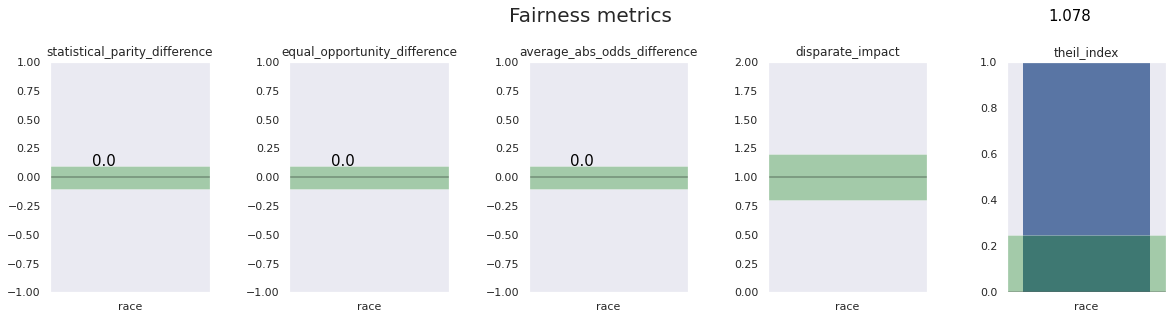

In [26]:
# Preparing the mitigated dataset
data_mitigated, encoders, numerical_features, categorical_features = prepare_data(decoded_df, priv_category, priv_value, target_label, 
                             priv_target_value=unencoded_target_label, ignore_cols=cols_to_drop)

# Split mitigated data to train and test dataset
np.random.seed(42)
data_mitigated_train, data_mitigated_test = data_mitigated.split([0.7], shuffle=True) 

# Retrain a model using the mitigated data
rf_mitigated = RandomForestClassifier().fit(data_mitigated_train.features, 
                     data_mitigated_train.labels.ravel(), 
                     sample_weight=data_mitigated_train.instance_weights)

# Get the new probabilities and predictions using the retrained model
probs = rf_mitigated.predict_proba(data_orig_test.features)
preds = rf_mitigated.predict(data_orig_test.features)

# Evaluate fairness given the mitigated data
display(Markdown('# Bias metrics for the model with protected attribute: ' + priv_category))
fair = get_fair_metrics_and_plot(data_orig_test, rf_mitigated)

# Add details in the algo_metrics dataframe
algo_metrics = add_to_df_algo_metrics(algo_metrics, rf_mitigated, fair, preds, probs, 'Learning Fair Representation')

#### Reweighing

Reweighing is a preprocessing technique that Weights the examples in each (group, label) combination differently to ensure fairness before classification.

Source : [Kamiran and Calders, 2012](https://link.springer.com/article/10.1007%2Fs10115-011-0463-8)

In [28]:
# Remove bias through reweighing
data_transf_df = reweight(data_orig, priv_category)

# Decode to pandas dataframe for readability
decoded_df = decode_dataset(data_transf_df, encoders_orig, numerical_features_orig, categorical_features_orig)
decoded_df

,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_violent_recid,is_recid
0,Male,69.0,Greater than 45,Other,0.0,1.0,0.0,0.0,0.0,0.0,No
1,Male,34.0,25 - 45,African-American,0.0,3.0,0.0,0.0,0.0,1.0,Yes
2,Male,24.0,Less than 25,African-American,0.0,4.0,0.0,1.0,4.0,0.0,Yes
3,Male,23.0,Less than 25,African-American,0.0,8.0,1.0,0.0,1.0,0.0,No
4,Male,43.0,25 - 45,Other,0.0,1.0,0.0,0.0,2.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...
10200,Male,23.0,Less than 25,African-American,0.0,3.0,0.0,0.0,0.0,0.0,No
10201,Female,31.0,25 - 45,African-American,0.0,6.0,0.0,0.0,5.0,0.0,No
10202,Male,57.0,Greater than 45,Other,0.0,1.0,0.0,0.0,0.0,0.0,No
10203,Female,33.0,25 - 45,African-American,0.0,2.0,0.0,0.0,3.0,0.0,No


# Bias metrics for the model with protected attribute: race

### Check bias metrics :

A model can be considered bias if just one of these five metrics show that this model is biased.

#### For the race attribute :

With default thresholds, bias against unprivileged group detected in **1** out of 5 metrics

,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,disparate_impact,theil_index
objective,0.000000,0.000000,0.000000,1.000000,0.000000
race,-0.110744,-0.032078,0.057604,0.852715,0.080127


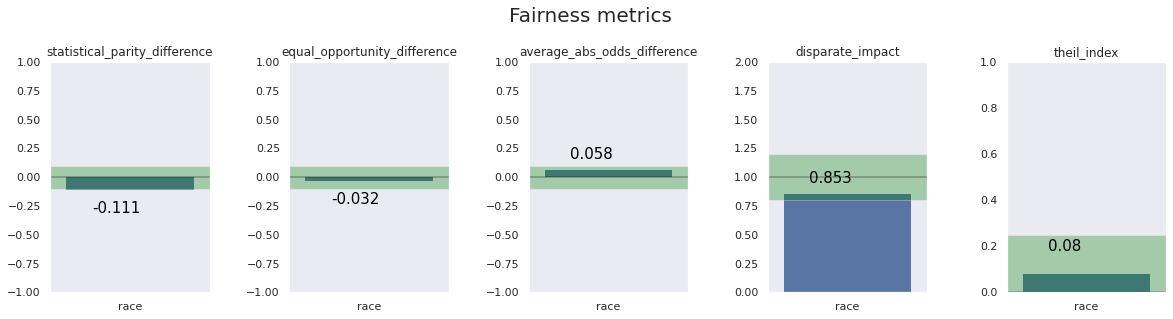

In [29]:
# Preparing the mitigated dataset
data_mitigated, encoders, numerical_features, categorical_features = prepare_data(decoded_df, priv_category, priv_value, target_label, 
                             priv_target_value=unencoded_target_label, ignore_cols=cols_to_drop)

# Split mitigated data to train and test dataset
data_mitigated_train, data_mitigated_test = data_mitigated.split([0.7], shuffle=True) 

# Retrain a model using the mitigated data
np.random.seed(42)
rf_mitigated = RandomForestClassifier().fit(data_mitigated_train.features, 
                     data_mitigated_train.labels.ravel(), 
                     sample_weight=data_mitigated_train.instance_weights)

# Get the new probabilities and predictions using the retrained model
probs = rf_mitigated.predict_proba(data_orig_test.features)
preds = rf_mitigated.predict(data_orig_test.features)

# Evaluate fairness given the mitigated data
display(Markdown('# Bias metrics for the model with protected attribute: ' + priv_category))
fair = get_fair_metrics_and_plot(data_orig_test, rf_mitigated)

# Add details in the algo_metrics dataframe
algo_metrics = add_to_df_algo_metrics(algo_metrics, rf_mitigated, fair, preds, probs, 'Reweighing')

## In-process Algorithm
The `original training dataset` is fed on the mitigation tool and transformed into a readable dataframe. The mitigated data will then be again processed into the standard format and retrain a new model using this mitigated data. This mitigated model will then be reavaluated with the fairness metrics. Probabilities and predictions using the mitigated models were also then derived and inlcuded in the master dataframe called `algo_metrics`.


### Prejudice Remover Regularizer

Prejudice remover is an in-processing technique that adds a discrimination-aware regularization term to the learning objective.

Source : [Kamishima et al., 2012](https://rd.springer.com/chapter/10.1007/978-3-642-33486-3_3)

In [31]:
%%time
data_transf_train_df, data_transf_test_df = prejudice_remover(data_orig_train, data_orig_test, priv_category, eta=25)

CPU times: user 269 ms, sys: 45.5 ms, total: 315 ms
Wall time: 30.1 s


In [32]:
# Decode to pandas dataframe using encoders from preprocessed data
decoded_train_df = decode_dataset(data_transf_train_df, encoders_orig, numerical_features_orig, categorical_features_orig)
decoded_train_df

,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_violent_recid,is_recid
5140,Male,55.0,Greater than 45,Caucasian,0.0,1.0,0.0,0.0,0.0,0.0,Yes
6192,Male,45.0,Greater than 45,Caucasian,0.0,1.0,0.0,0.0,1.0,0.0,Yes
1087,Male,37.0,25 - 45,African-American,0.0,2.0,0.0,0.0,4.0,0.0,Yes
2245,Male,45.0,Greater than 45,Caucasian,0.0,1.0,0.0,0.0,8.0,0.0,Yes
10063,Female,29.0,25 - 45,African-American,0.0,3.0,0.0,0.0,2.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8603,Male,39.0,25 - 45,African-American,0.0,9.0,0.0,0.0,4.0,0.0,Yes
9512,Male,39.0,25 - 45,African-American,0.0,6.0,0.0,0.0,1.0,0.0,Yes
5659,Male,34.0,25 - 45,African-American,0.0,1.0,0.0,0.0,0.0,0.0,Yes
6856,Male,63.0,Greater than 45,African-American,0.0,6.0,0.0,0.0,8.0,0.0,Yes


In [33]:
# Decode to pandas dataframe using encoders from preprocessed data
decoded_test_df = decode_dataset(data_transf_test_df, encoders_orig, numerical_features_orig, categorical_features_orig)
decoded_test_df

,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_violent_recid,is_recid
10172,Male,22.0,Less than 25,African-American,0.0,6.0,0.0,0.0,4.0,0.0,Yes
4305,Male,49.0,Greater than 45,Caucasian,0.0,6.0,0.0,0.0,5.0,0.0,Yes
909,Male,53.0,Greater than 45,Hispanic,0.0,1.0,0.0,0.0,0.0,0.0,Yes
5385,Male,21.0,Less than 25,Caucasian,0.0,7.0,0.0,0.0,2.0,0.0,Yes
1996,Male,41.0,25 - 45,African-American,0.0,7.0,0.0,0.0,7.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5734,Male,45.0,Greater than 45,Caucasian,0.0,2.0,0.0,0.0,7.0,0.0,Yes
5191,Male,57.0,Greater than 45,African-American,0.0,5.0,0.0,0.0,9.0,0.0,Yes
5390,Male,24.0,Less than 25,African-American,0.0,9.0,0.0,0.0,11.0,0.0,No
860,Male,28.0,25 - 45,Caucasian,0.0,9.0,0.0,0.0,1.0,0.0,Yes


# Bias metrics for the model with protected attribute: race

### Check bias metrics :

A model can be considered bias if just one of these five metrics show that this model is biased.

#### For the race attribute :

With default thresholds, bias against unprivileged group detected in **3** out of 5 metrics

,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,disparate_impact,theil_index
objective,0.000000,0.000000,0.000000,1.000000,0.000000
race,0.112632,0.057136,0.097467,2.209069,1.054776


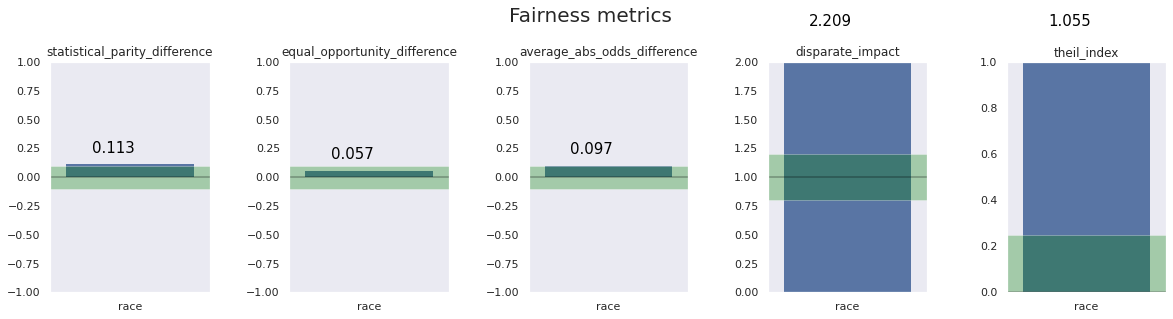

In [34]:
# preparing the mitigated dataset
data_mitigated_train, encoders, numerical_features, categorical_features = prepare_data(decoded_train_df, priv_category, priv_value, target_label, 
                             priv_target_value=unencoded_target_label, ignore_cols=cols_to_drop)

# Retrain a model using the mitigated data
rf_mitigated = RandomForestClassifier().fit(data_mitigated_train.features, 
                     data_mitigated_train.labels.ravel(), 
                     sample_weight=data_mitigated_train.instance_weights)


# Get the new probabilities and predictions using the retrained model
probs = rf_mitigated.predict_proba(data_orig_test.features)
preds = rf_mitigated.predict(data_orig_test.features)

# Evaluate fairness given the mitigated data
display(Markdown('# Bias metrics for the model with protected attribute: ' + priv_category))
fair = get_fair_metrics_and_plot(data_orig_test, rf_mitigated)

# Add details in the algo_metrics dataframe
algo_metrics = add_to_df_algo_metrics(algo_metrics, rf_mitigated, fair, preds, probs, 'Prejudice Remover Regularizer')

## Post-processing algorithm

### Calibrated Equality of Odds

Calibrated equalized odds postprocessing is a post-processing technique that optimizes over calibrated classifier score outputs to find probabilities with which to change output labels with an equalized odds objective.

Source : [Pleiss et al., 2017](https://papers.nips.cc/paper/7151-on-fairness-and-calibration)

For post-processing, a different way of preparation is needed. `Predictions and scores` are also formated which will be done in the next cell. Along with the original training and testing dataset, the original testing predictions are fed on the mitigation tool.

In [36]:
data_orig_test_pred = data_orig_test.copy(deepcopy=True)

# Prediction with the original RandomForest model
scores = np.zeros_like(data_orig_test.labels)
scores = rf_orig_model.predict_proba(data_orig_test.features)[:,1].reshape(-1,1)
data_orig_test_pred.scores = scores

preds = np.zeros_like(data_orig_test.labels)
preds = rf_orig_model.predict(data_orig_test.features).reshape(-1,1)
data_orig_test_pred.labels = preds

def format_probs(probs1):
    probs1 = np.array(probs1)
    probs0 = np.array(1-probs1)
    return np.concatenate((probs0, probs1), axis=1)

### Calibrated Equality of Odds

In [37]:
%%time
data_trans_pred, CPP = calibrate_equality_of_odds(data_orig_train, data_orig_test, data_orig_test_pred, priv_category)

CPU times: user 41.7 ms, sys: 2.6 ms, total: 44.3 ms
Wall time: 47.2 ms


In [38]:
#fair = fair_metrics(data_orig_test, data_orig_test_pred, pred_is_dataset=True)
display(Markdown('# Bias metrics for the model with protected attribute: ' + priv_category))
fair = get_fair_metrics(data_orig_test, data_trans_pred, pred_is_dataset=True)

# Add details in the algo_metrics dataframe
algo_metrics = add_to_df_algo_metrics(algo_metrics, CPP, fair, data_trans_pred.labels, format_probs(data_trans_pred.scores), 'Calibrated Equality of Odds')

fair

# Bias metrics for the model with protected attribute: race

,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,disparate_impact,theil_index
objective,0.000000,0.000000,0.000000,1.0,0.000000
race,-0.206274,-0.129555,0.259311,0.0,1.021985


# Backend Helper Tools
The following codes creates tables that are extracted from the `algo_metrics` master dataframe and exports it into a csv/json file. These are then used for creating visualization reports in the parity platform.

## Compare Bias Metric Results
The next cell creates a new table consisting each mitigation tool and its corresponding new results of the different fairness metrics.

In [40]:
compare_df = compare_fair_metrics(algo_metrics, priv_category)
compare_df

,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,disparate_impact,theil_index
Origin,-0.140322,-0.088268,0.123412,0.823634,0.164798
Disparate Impact Remover,-0.200043,-0.150399,0.182142,0.756992,0.165682
Learning Fair Representation,0.000000,0.000000,0.000000,NaN,1.077926
Reweighing,-0.110744,-0.032078,0.057604,0.852715,0.080127
Prejudice Remover Regularizer,0.112632,0.057136,0.097467,2.209069,1.054776
Calibrated Equality of Odds,-0.206274,-0.129555,0.259311,0.000000,1.021985


## Additional Columns
Succeeding cells add new columns that store the percentage change of the different fairness metric results after mitigation, using `Origin` (which contains the metric results before mitigation). Another column to add is the `target_value` which is the metric value that reflects a completely no bias. While `upper_bound` and `lower_bound` are values of the threshold or boundaries that determines whether results shows

Put metrics in a list

In [43]:
all_metrics = list(compare_df.columns)

Get all the percentage difference of the metric results per mitigation

In [44]:
for metric in all_metrics:
  compare_df[metric+'_%change'] = compare_df[metric].apply(lambda x: round((abs(abs(compare_df.loc['Origin', metric]) - abs(x)) * 100), 2))
compare_df

,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,disparate_impact,theil_index,statistical_parity_difference_%change,equal_opportunity_difference_%change,average_abs_odds_difference_%change,disparate_impact_%change,theil_index_%change
Origin,-0.140322,-0.088268,0.123412,0.823634,0.164798,0.00,0.00,0.00,0.00,0.00
Disparate Impact Remover,-0.200043,-0.150399,0.182142,0.756992,0.165682,5.97,6.21,5.87,6.66,0.09
Learning Fair Representation,0.000000,0.000000,0.000000,NaN,1.077926,14.03,8.83,12.34,NaN,91.31
Reweighing,-0.110744,-0.032078,0.057604,0.852715,0.080127,2.96,5.62,6.58,2.91,8.47
Prejudice Remover Regularizer,0.112632,0.057136,0.097467,2.209069,1.054776,2.77,3.11,2.59,138.54,89.00
Calibrated Equality of Odds,-0.206274,-0.129555,0.259311,0.000000,1.021985,6.60,4.13,13.59,82.36,85.72


Threshold of the different metrics are as follows:
- [-0.1, 0.1] - Statistical Parity Difference, Equal Opportunity Difference, and Average Absolute Odds Difference 
- [0.8, 1.2] - Disparate Impact Remover
- [0, 0.25] - Theil Index

List of all metrics that has a threshold of [-0.1, 0.1]

In [45]:
metrics_SEA =  ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference']

Add new columns such as a bool col (whether if mitigated or not), target_value and, lower and upper bound columns

In [46]:
for metric in metrics_SEA:
  compare_df[metric+ '_target_value'] = 0
  compare_df[metric+ '_upper_bound'] = 0.1
  compare_df[metric+ '_lower_bound'] = -0.1
  compare_df[metric+'_isMitigated'] = compare_df[metric].apply(lambda x: 'Yes' if (x >= -0.1) and (x <= 0.1) else 'No')
  
compare_df['disparate_impact_isMitigated'] = compare_df['disparate_impact'].apply(lambda x: 'Yes' if (x >= 0.8) and (x <= 1.2) else 'No')
compare_df['disparate_impact_target_value'] = 1
compare_df['disparate_impact_upper_bound'] = 1.2
compare_df['disparate_impact_lower_bound'] = 0.8

compare_df['theil_index_isMitigated'] = compare_df['theil_index'].apply(lambda x: 'Yes' if (x >= 0) and (x <= 0.25) else 'No')
compare_df['theil_index_value'] = 0
compare_df['theil_index_upper_bound'] = 0.25
compare_df['theil_index_lower_bound'] = 0

Create a new table containing only the additional columns

In [47]:
metrics_col = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference', 'disparate_impact', 'theil_index']
compare_diff_df = compare_df.drop(columns = metrics_col, axis = 0)
compare_diff_df

,statistical_parity_difference_%change,equal_opportunity_difference_%change,average_abs_odds_difference_%change,disparate_impact_%change,theil_index_%change,statistical_parity_difference_target_value,statistical_parity_difference_upper_bound,statistical_parity_difference_lower_bound,statistical_parity_difference_isMitigated,equal_opportunity_difference_target_value,equal_opportunity_difference_upper_bound,equal_opportunity_difference_lower_bound,equal_opportunity_difference_isMitigated,average_abs_odds_difference_target_value,average_abs_odds_difference_upper_bound,average_abs_odds_difference_lower_bound,average_abs_odds_difference_isMitigated,disparate_impact_isMitigated,disparate_impact_target_value,disparate_impact_upper_bound,disparate_impact_lower_bound,theil_index_isMitigated,theil_index_value,theil_index_upper_bound,theil_index_lower_bound
Origin,0.00,0.00,0.00,0.00,0.00,0,0.1,-0.1,No,0,0.1,-0.1,Yes,0,0.1,-0.1,No,Yes,1,1.2,0.8,Yes,0,0.25,0
Disparate Impact Remover,5.97,6.21,5.87,6.66,0.09,0,0.1,-0.1,No,0,0.1,-0.1,No,0,0.1,-0.1,No,No,1,1.2,0.8,Yes,0,0.25,0
Learning Fair Representation,14.03,8.83,12.34,NaN,91.31,0,0.1,-0.1,Yes,0,0.1,-0.1,Yes,0,0.1,-0.1,Yes,No,1,1.2,0.8,No,0,0.25,0
Reweighing,2.96,5.62,6.58,2.91,8.47,0,0.1,-0.1,No,0,0.1,-0.1,Yes,0,0.1,-0.1,Yes,Yes,1,1.2,0.8,Yes,0,0.25,0
Prejudice Remover Regularizer,2.77,3.11,2.59,138.54,89.00,0,0.1,-0.1,No,0,0.1,-0.1,Yes,0,0.1,-0.1,Yes,No,1,1.2,0.8,No,0,0.25,0
Calibrated Equality of Odds,6.60,4.13,13.59,82.36,85.72,0,0.1,-0.1,No,0,0.1,-0.1,No,0,0.1,-0.1,No,No,1,1.2,0.8,No,0,0.25,0


### Add column for counting the number of biases mitigated by each algorithm. 

---


(Best algorithm to mitigate bias is shown in the last column)


In [48]:
metrics_col_mitigated = [x + '_isMitigated' for x in metrics_col]
compare_diff_df['Total Number of Mitigated Biases'] = (compare_diff_df[metrics_col_mitigated] == 'Yes').sum(1)

In [49]:
compare_diff_df

,statistical_parity_difference_%change,equal_opportunity_difference_%change,average_abs_odds_difference_%change,disparate_impact_%change,theil_index_%change,statistical_parity_difference_target_value,statistical_parity_difference_upper_bound,statistical_parity_difference_lower_bound,statistical_parity_difference_isMitigated,equal_opportunity_difference_target_value,equal_opportunity_difference_upper_bound,equal_opportunity_difference_lower_bound,equal_opportunity_difference_isMitigated,average_abs_odds_difference_target_value,average_abs_odds_difference_upper_bound,average_abs_odds_difference_lower_bound,average_abs_odds_difference_isMitigated,disparate_impact_isMitigated,disparate_impact_target_value,disparate_impact_upper_bound,disparate_impact_lower_bound,theil_index_isMitigated,theil_index_value,theil_index_upper_bound,theil_index_lower_bound,Total Number of Mitigated Biases
Origin,0.00,0.00,0.00,0.00,0.00,0,0.1,-0.1,No,0,0.1,-0.1,Yes,0,0.1,-0.1,No,Yes,1,1.2,0.8,Yes,0,0.25,0,3
Disparate Impact Remover,5.97,6.21,5.87,6.66,0.09,0,0.1,-0.1,No,0,0.1,-0.1,No,0,0.1,-0.1,No,No,1,1.2,0.8,Yes,0,0.25,0,1
Learning Fair Representation,14.03,8.83,12.34,NaN,91.31,0,0.1,-0.1,Yes,0,0.1,-0.1,Yes,0,0.1,-0.1,Yes,No,1,1.2,0.8,No,0,0.25,0,3
Reweighing,2.96,5.62,6.58,2.91,8.47,0,0.1,-0.1,No,0,0.1,-0.1,Yes,0,0.1,-0.1,Yes,Yes,1,1.2,0.8,Yes,0,0.25,0,4
Prejudice Remover Regularizer,2.77,3.11,2.59,138.54,89.00,0,0.1,-0.1,No,0,0.1,-0.1,Yes,0,0.1,-0.1,Yes,No,1,1.2,0.8,No,0,0.25,0,2
Calibrated Equality of Odds,6.60,4.13,13.59,82.36,85.72,0,0.1,-0.1,No,0,0.1,-0.1,No,0,0.1,-0.1,No,No,1,1.2,0.8,No,0,0.25,0,0
